Pontificia Universidad Católica de Chile 

Instituto de Ingeniería Matemática y Computacional 

Magister en Inteligencia Artificial - MIA 

Tarea 2 

Fundamentos Matemáticos para la Inteligencia Artif{icial IMT3850 2022 

Prof. Manuel A. Sánchez 

Mayo 2022 

Alumno: Ronald Castillo Capino

Preguntas 

1. (10 puntos) __Variables aleatorias__.

Muestre que si X e Y son variables aleatorias independientes, entonces: 

$Var[X + Y ] = Var[X] + Var[Y ]$ 

Por definicion de $Var$, podemos obtener que:

$$Var[X+Y]=\mathbb{E}[(X+Y-\mathbb{E}[(X+Y)])^2]$$
$$→Var[X+Y]=\mathbb{E}[(X-\mathbb{E}[X]+Y-\mathbb{E}[Y])^2]$$
$$→Var[X+Y]=\mathbb{E}[(X-\mathbb{E}[X])^2+2(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])+(Y-\mathbb{E}[Y])^2]$$
$$→Var[X+Y]=\mathbb{E}[(X-\mathbb{E}[X])^2]+2\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]+\mathbb{E}[(Y-\mathbb{E}[Y])^2]$$

Por definicion $\mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]=Cov(X,Y)$, entonces se tiene:

$$→Var[X+Y]=Var[X]+2Cov(X,Y)+Var[Y]$$

Como las variables X, Y son independientes, lo que implica que $Cov(X,Y)=0$, por lo tanto se obtiene finalmente que:
$$→Var[X+Y]=Var[X]+Var[Y]  \square$$

2. (20 puntos) __Algoritmo Random Quicksort.__ 

En clases observamos que el número esperado de comparaciones realizadas por el algoritmo Quicksort Aleatorio es de 2nln(n) + O(n), donde n es el largo de la lista S. El objetivo es testear este resultado. Para esto: 

a) Programe el algoritmo Quicksort con pivot aleatorio presentado en clases para ordenar de forma ascendente una lista S de números reales distintos. Corrobore que su algoritmo funciona mostrando la lista ordenada S = [0, 5, 4, 1, 7, 6, 3, 2, 8, 9]. 

In [48]:
import random
def quicksort(S):
  if len(S)>1:
    x=random.sample(S,1)
    S1=list(filter(lambda y:x[0]>y,S))
    S2=list(filter(lambda y:x[0]<y,S))
    S1,cont1=quicksort(S1)
    S2,cont2=quicksort(S2)
    cont=cont1+cont2+len(S)
    return [S1+x+S2,cont]
  else:
    return [S,len(S)]

#lista a probar:
S = [0, 5, 4, 1, 7, 6, 3, 2, 8, 9]
print("lista a probar:",S)
#resultado:
Z,_=quicksort(S)
print("lista resultado quicksort aleatorio:",Z)

lista a probar: [0, 5, 4, 1, 7, 6, 3, 2, 8, 9]
lista resultado quicksort aleatorio: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


b) Para largo de lista n fijo, obtenga lista aleatorias y aplique el algoritmo a cada una de ellas calculando el numero de comparaciones realizadas en el algoritmo. Calcule el promedio de estas para n fijo.

In [49]:
def comp_quicksort_n(n):
  X=random.sample(range(n**2),n)
  _,aux=quicksort(X)
  return aux

n=100
p=100
avg=list(map(comp_quicksort_n,[n]*p))
print(f"el promedio de las listas aleatorias de tamaño {n} es:{sum(avg)/p}")

el promedio de las listas aleatorias de tamaño 100 es:745.64


c) Repite el procedimiento anterior para n = [100, 200, 300, ..., 5000] y grafique n vs. el promedio de comparaciones para cada n. Ademas grafique las curvas correspondientes a $y=2nln(n)$ y $y=2n$. 

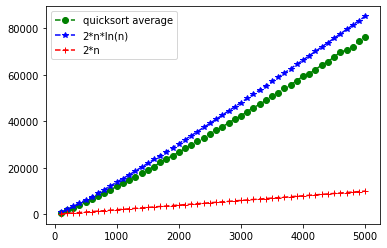

In [50]:
import pandas as pd
p=100
L=pd.DataFrame(map(lambda n:(n,sum(map(comp_quicksort_n,[n]*p))/p),range(100,5100,100)),columns=['size','average'])
L['curva1']=np.log(L['size'])*L['size']*2
L['curva2']=L['size']*2

import matplotlib.pyplot as plt
plt.plot(L['size'],L['average'],'o--',color='green',label='quicksort average')
plt.plot(L['size'],L['curva1'],'*--',color='blue',label='2*n*ln(n)')
plt.plot(L['size'],L['curva2'],'+--',color='red',label='2*n')
plt.legend()
plt.show()

d) Explique porque los resultados del experimento corroboran los resultados teóricos.

Como se puede ver en la grafica anterior, en promedio la cantidad de comparaciones para el __Quick Sort Aleatorio__, es casi un poquito menor que $2n\ln(n)$, por lo que se espera un valor cercano a lo esperado por el _teorema_. 

Este __Teorema__ dice, que si la forma de escojer aleatoriamente un valor de pivote, es de forma independiete y uniforme discreta entre todos los elementos de la lista. Entonces el numero esperado de comparaciones por el algoritmo es de la forma $2n\ln(n)+O(n)$.

3. (10 puntos) __Convexidad__ 

Sea $f:\mathbb{R}^d→\mathbb{R}$ una función es diferenciable. Prube que f es una función convexa si y sólo si se satisface $f(y) ≥ f(x) + ∇f(x)^T(y − x)$ 
para todo x, y en el dominio de f. 

Como f es convexa, entonces se tiene que:
$$f(\alpha y+ (1-\alpha)x)\le \alpha f(y)+(1-\alpha)f(x), \forall \alpha \in [0,1]$$
$$\rightarrow f(x+\alpha (y-x))\le f(x) +\alpha (f(y)-f(x)), \forall \alpha \in [0,1]$$
$$\rightarrow f(x+\alpha (y-x))-f(x)\le \alpha (f(y)-f(x)), \forall \alpha \in [0,1]$$
$$\rightarrow \frac{f(x+\alpha (y-x))-f(x)}{\alpha} \le f(y)-f(x), \forall \alpha \in [0,1]$$
Como $\alpha$ puede ser 0 tambien y la funcion es diferenciable, entonces podemos hacer $\alpha\rightarrow0$, con lo que quedaria:

$$Lim_{\alpha\rightarrow0}\frac{f(x+\alpha(y-x))-f(x)}{\alpha}=\frac{df(x+\alpha (y-x))}{d\alpha}|_{\alpha=0}=∇f(x)^T(y-x)$$

Por lo tanto, se tiene que:

$$\rightarrow ∇f(x)^T(y-x) \le f(y)-f(x)$$
$$\rightarrow ∇f(x)^T(y-x)+f(x) \le f(y)\square$$


4. (20 puntos) __Descenso del gradiente__

Considere el set de datos datos_lineales.csv que contiene pares de puntos $(x, y) \in \mathbb{R}^2$. Se busca resolver el problema: 
 

$$mín_{\theta \in \mathbb{R}^2} \frac{1}{2N} \|X\theta − y\|^2_2, X \in \mathbb{R}^{N×2}, y \in \mathbb{R}^N$$ 

donde $θ$ son los coeficientes del polinomio lineal que mejor ajusta la matriz de datos X con los valores y.

a) Programe el algoritmo de descenso de gradiente para resolver este problema. Considere como parámetros de este algoritmo: __X, y, NITMAX, $\gamma$__ donde __NITMAX__ es el máximo número de iteraciones y __$\gamma$__ es la función tasa de aprendizaje.

In [15]:
import numpy as np
def des_grad(X,y,gamma,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  for i in range(NITMAX):
    theta-=gamma*np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/N
    if np.linalg.norm(np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))/N<tol:
      break
  return theta

In [16]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/Tarea 2/datos_lineales.csv')
X=data.x.values.reshape(-1,1)
#agregamos una columnas de 1, para calcular tambien el intercepto de la regresion lineal
X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
y=data.y.values.reshape(-1,1)
#taza de aprendizaje fijo
gamma=.5
#numero maximo de iteraciones
NITMAX=10**5
print("El valor de theta es para el algoritmo de gradiente descendente:")
print(des_grad(X,y,gamma,NITMAX))

El valor de theta es para el algoritmo de gradiente descendente:
[[0.98833908]
 [2.94783585]]



b) Programe el algoritmo de descenso de gradiente estocástico para resolver este problema. Considere como parámetros de este algoritmo: __X, y, NITMAX, $\gamma$__ donde __NITMAX__ es el máximo número de iteraciones y __$\gamma$__ es la función tasa de aprendizaje. 

In [17]:
import random
def des_grad_sto(X,y,gamma,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  #El tamaño de la muestra de la data es √n
  size=int(N**.5)
  for i in range(NITMAX):
    pos=random.sample(range(N),size)
    X1=X[pos,:].reshape(size,-1)
    y1=y[pos,:].reshape(size,-1)
    theta1=theta-gamma*np.matmul(np.transpose(X1),(np.matmul(X1,theta)-y1))/N
    if np.linalg.norm(theta1-theta)<tol:
      break
    else:
      theta=theta1
  return theta

In [18]:
X=data.x.values.reshape(-1,1)
#agregamos una columnas de 1, para calcular tambien el intercepto de la regresion lineal
X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
y=data.y.values.reshape(-1,1)
#taza de aprendizaje fijo
gamma=.5
#numero maximo de iteraciones
NITMAX=10**5
print("El valor de theta es para el algoritmo de gradiente descendente estocastico:")
print(des_grad_sto(X,y,gamma,NITMAX))

El valor de theta es para el algoritmo de gradiente descendente estocastico:
[[1.02956772]
 [2.93701793]]


c) Considere las siguientes tasas de aprendizaje: 
$$γ(t) = γ_{clases}(t), \hspace{1em} γ(t) = \frac{1}{\sqrt{t}}$$ 
Donde $γ_{clases}$ es la heurística vista en clases. Para cada una ejecute 100 veces el algoritmo estocástico y reporte el promedio de los resultados. Compare estos sus resultados con los del algoritmo determinista con la tasa correspondiente. 

In [19]:
import numpy as np
import pandas as pd
import random
#gamma calculado con metodo de backtraking
def backtrack(theta,X,y,N):
  dfx=np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/N
  fx=np.linalg.norm(np.matmul(X,theta)-y)**2/(2*N)
  gamma,alpha, beta=[.5,.5,.9]  
  while np.linalg.norm(np.matmul(X,theta-gamma*dfx)-y)**2/(2*N)>fx-alpha*gamma*np.linalg.norm(dfx)**2:
      gamma*= beta
  return gamma

#gradiente descendente con tamaño de paso de backtraking
def des_grad_backtraking(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.size
  for i in range(NITMAX):
    gamma=backtrack(theta,X,y,N)
    theta-=gamma*np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/N
    if np.linalg.norm(np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))/N<tol:
      break
  return theta

#gradiente descendente estocastico con tamaño de paso de backtraking
def des_grad_stochastic_backtraking(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  size=int(N**.5)
  for i in range(NITMAX):
    pos=random.sample(range(N),size)
    X1=X[pos,:].reshape(size,-1)
    y1=y[pos,:].reshape(size,-1)
    gamma=backtrack(theta,X1,y1,N)
    theta1=theta-gamma*np.matmul(np.transpose(X1),(np.matmul(X1,theta)-y1))/N
    if np.linalg.norm(theta1-theta)<tol:
      break
    else:
      theta=theta1
  return theta

#gradiente descendente con tamaño de paso de la inversa de la raiz
def des_grad_frac_raiz(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  for i in range(1,NITMAX+1):
    theta-=np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/(i**.5*N)
    if np.linalg.norm(np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))/N<tol:
      break
  return theta

#gradiente descendente estocastico con tamaño de paso de la inversa de la raiz
def des_grad_stochastic_frac_raiz(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  #El tamaño de la muestra de la data es √n
  size=int(N**.5)
  for i in range(1,NITMAX+1):
    pos=random.sample(range(N),size)
    X1=X[pos,:].reshape(size,-1)
    y1=y[pos,:].reshape(size,-1)
    theta1=theta-np.matmul(np.transpose(X1),(np.matmul(X1,theta)-y1))/(i**.5*N)
    if np.linalg.norm(theta1-theta)<tol:
      break
    else:
      theta=theta1
  return theta


data=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/Tarea 2/datos_lineales.csv')
X=data.x.values.reshape(-1,1)
#agregamos una columnas de 1, para calcular tambien el intercepto de la regresion lineal
X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
y=data.y.values.reshape(-1,1)
#numero maximo de iteraciones
NITMAX=10**5
print("El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje backtraking:")
print(des_grad_backtraking(X,y,NITMAX))
print("El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje  1/√t:")
print(des_grad_frac_raiz(X,y,NITMAX))
sgd_bt=[]
sgd_raiz=[]
for j in range(100):
  sgd_bt+=[des_grad_stochastic_backtraking(X,y,NITMAX)]
  sgd_raiz+=[des_grad_stochastic_frac_raiz(X,y,NITMAX)]

print("El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje backtraking:")
print(np.mean(sgd_bt,axis=0))
print("El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje 1/√t:")
print(np.mean(sgd_raiz,axis=0))

El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje backtraking:
[[0.98844028]
 [2.94775293]]
El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje  1/√t:
[[0.98844146]
 [2.94775196]]
El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje backtraking:
[[0.98891037]
 [2.95038902]]
El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje 1/√t:
[[1.30418993]
 [2.6879343 ]]


Como se puede ver los resultados anteriores, la taza de aprendizaje para el gradiente descendente(GD), no importa mucho. Ya que son relativamente similares, por lo que si se ocupa una taza de aprendizaje _"buena"_ siempre va a converger con el metodo de gradiente descendente(GD). En cambio para el metodo del gradiente descendetnte estocastico (SGD), se puede ver que el metodo de tamaño de pasos de la forma __backtraking__ se aproxima mucho mejor al GD que el otro metodo de taza de aprendizaje, por lo que se podria concluir que el metodo SGD en conjunto con backtraking, se podria ocupar para un modelo, donde se necesita mucha data para el aprendizaje de la maquina, y este seria mejor que el GD.  


d) Repita el item anterior pero ahora con el set de datos datos_cuadraticos.csv. Notar que ahora $X ∈ \mathbb{R}^{N×3}$ y que $θ ∈ \mathbb{R}^3$. 

In [20]:
import numpy as np
import pandas as pd
import random

def backtrack(theta,X,y,N):
  dfx=np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/N
  fx=np.linalg.norm(np.matmul(X,theta)-y)**2/(2*N)
  gamma,alpha, beta=[.5,.5,.9]  
  while np.linalg.norm(np.matmul(X,theta-gamma*dfx)-y)**2/(2*N)>fx-alpha*gamma*np.linalg.norm(dfx)**2:
      gamma*= beta
  return gamma
  
def des_grad_backtraking(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  for i in range(NITMAX):
    gamma=backtrack(theta,X,y,N)
    theta-=gamma*np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/N
    if np.linalg.norm(np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))/N<tol:
      break
  return theta

def des_grad_stochastic_backtraking(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  #El tamaño de la muestra de la data es √n
  size=int(N**.5)
  for i in range(NITMAX):
    pos=random.sample(range(N),size)
    X1=X[pos,:].reshape(size,-1)
    y1=y[pos,:].reshape(size,-1)
    gamma=backtrack(theta,X1,y1,N)
    theta1=theta-gamma*np.matmul(np.transpose(X1),(np.matmul(X1,theta)-y1))/N
    if np.linalg.norm(theta1-theta)<tol:
      break
    else:
      theta=theta1
  return theta

def des_grad_frac_raiz(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  for i in range(1,NITMAX+1):
    theta-=np.matmul(np.transpose(X),(np.matmul(X,theta)-y))/(N*i**.5)
    if np.linalg.norm(np.matmul(np.transpose(X),(np.matmul(X,theta)-y)))/N<tol:
      break
  return theta

def des_grad_stochastic_frac_raiz(X,y,NITMAX):
  theta=np.random.normal(0,1,size=(X.shape[1],y.shape[1]))
  tol=10**-5
  N=y.shape[0]
  #El tamaño de la muestra de la data es √n
  size=int(N**.5)
  for i in range(1,NITMAX+1):
    pos=random.sample(range(N),size)
    X1=X[pos,:].reshape(size,-1)
    y1=y[pos,:].reshape(size,-1)
    theta1=theta-np.matmul(np.transpose(X1),(np.matmul(X1,theta)-y1))/(N*i**.5)
    if np.linalg.norm(theta1-theta)<tol:
      break
    else:
      theta=theta1
  return theta


data=pd.read_csv('/content/drive/MyDrive/MIA/IMT3850 - Fundamentos Matemáticos para Inteligencia Artificial/Tarea 2/datos_cuadraticos.csv')
X=data.x.values.reshape(-1,1)
#agregamos una columnas de 1, para calcular tambien el intercepto y elemento cuadratico de la regresion cuadratica
X=np.concatenate([np.ones((X.shape[0],1)),X,X**2],axis=1)
y=data.y.values.reshape(-1,1)
#numero maximo de iteraciones
NITMAX=10**5
print("El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje backtraking:")
print(des_grad_backtraking(X,y,NITMAX))
print("El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje  1/√t:")
print(des_grad_frac_raiz(X,y,NITMAX))
sgd_bt=[]
sgd_raiz=[]
for j in range(100):
  sgd_bt+=[des_grad_stochastic_backtraking(X,y,NITMAX)]
  sgd_raiz+=[des_grad_stochastic_frac_raiz(X,y,NITMAX)]

print("El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje backtraking:")
print(np.mean(sgd_bt,axis=0))
print("El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje 1/√t:")
print(np.mean(sgd_raiz,axis=0))

El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje backtraking:
[[ 0.97960596]
 [-1.9682466 ]
 [ 0.9889967 ]]
El valor de theta es para el algoritmo de gradiente descendente, con taza de aprendizaje  1/√t:
[[ 0.97948597]
 [-1.9679338 ]
 [ 0.98885289]]
El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje backtraking:
[[ 0.97943468]
 [-1.96837072]
 [ 0.98926943]]
El valor de theta es para el algoritmo de gradiente descendente estocastico, con taza de aprendizaje 1/√t:
[[ 0.3369445 ]
 [-0.30916454]
 [ 0.22314387]]


Al igual que en el caso anterior, el __SGD__ con taza de aprendizaje de la forma $\frac{1}{\sqrt{t}}$, es muy mal metodo para encontrar el optimo, _vs_ el de __backtraking__, que los valores son similares a los de __GD__. 

5. (10 puntos) Bonus: __Algoritmo de mediana aleatoria__

Programe el algoritmo mediana aleatoria visto en clases. Realice experiementos aleatorios y muestre evidencia de que el algoritmo calcula con éxito la mediana de una lista.

In [46]:
import random
import math 
import numpy as np
import pandas as pd
#Ordenamiento de Quicksort con elementos repetidos
def quicksort(S):
  if len(S)>1:
    x=random.sample(S,1)
    S1=list(filter(lambda y:x[0]>y,S))
    S2=list(filter(lambda y:x[0]<y,S))
    S1,cont1=quicksort(S1)
    S2,cont2=quicksort(S2)
    cont=cont1+cont2+len(S)
    return [S1+x*S.count(x[0])+S2,cont]
  else:
    return [S,len(S)]
def media_aleatoria(S):
  n = len(S)
  #n tiene que ser mayor que 16, ya que n**(3/4)/2-n**(1/2)>0=>(factorizando por n**(1/2)) n**(1/4)/2-1>0=>n**(1/4)>2=>n>2**4=16 para que funcione el algoritmo
  if n>16:
    n34 = n**(3/4)
    n12 = n**(1/2)
    n1=int(math.ceil(n34))
    R = random.sample(S,n1)
    R, _ = quicksort(R)
    d = R[int(n34/2 - n12)]
    u = R[int(n34/2 + n12-1)]
    ld=sum(map(lambda x:x<d,S))
    lu=sum(map(lambda x:x>u,S))
    C=list(filter(lambda x:d<=x<=u,S))
    if ld > n/2 or lu > n/2:
      print("error")
      return np.nan
    elif len(C) <= 4*n34:
      C, _ = quicksort(C)
      return C[n//2-ld+1]
    else:
      print("error")
      return np.nan
  elif (n<=16) and (n>1):
    return media_aleatoria((16//n+1)*S)
  elif n==1:
    return S[0]
  else:
    print("no tiene elementos")

C=[]
for i in range(100):
  S=random.sample(range(1000),random.randint(10,100))
  C+=[pd.DataFrame({'algoritmo de la clase con orden quicksort':[media_aleatoria(S)],'mediana de numpy':[np.median(S)],'tamaño':[len(S)]})]
D=pd.concat(C,axis=0).reset_index(drop=True)
D

,algoritmo de la clase con orden quicksort,mediana de numpy,tamaño
0,453,450.0,62
1,462,441.5,36
2,560,557.0,83
3,641,566.0,46
4,602,592.5,26
...,...,...,...
95,584,553.5,24
96,528,510.0,65
97,458,450.5,64
98,539,515.5,94


Como se puede ver en la tabla anterior, el algoritmo de mediana aleatoria no encuentra exactamente siempre el valor de la mediana, ya que este se va reduciendo de el conjunto a un subconjunto de forma aleatoria. Pero si se acerca bastante al valor real. Se puede calcular su error absoluto el cual es:

In [47]:
((D['algoritmo de la clase con orden quicksort']-D['mediana de numpy']).abs()/D['tamaño']).mean()

1.0163863255987688

Por lo que en promedio tendria una MAE de no mas de 2.